<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from pathlib import Path
import os
import PIL
import pickle
import cv2
import PIL.Image
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [17]:
# Loading Data And Defining Features And Labels
directory = Path("/content/drive/MyDrive/flowers")

flowers = []
features = []
labels = []

# Size Of The Image
size = 128,128

# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      img = image.load_img(imgpath, target_size = size)
      img_arr = image.img_to_array(img)
      im = tf.image.rgb_to_grayscale(img_arr)
      features.append(im)
  else:
    continue

sunflower
daisy
dandelion
tulip
rose


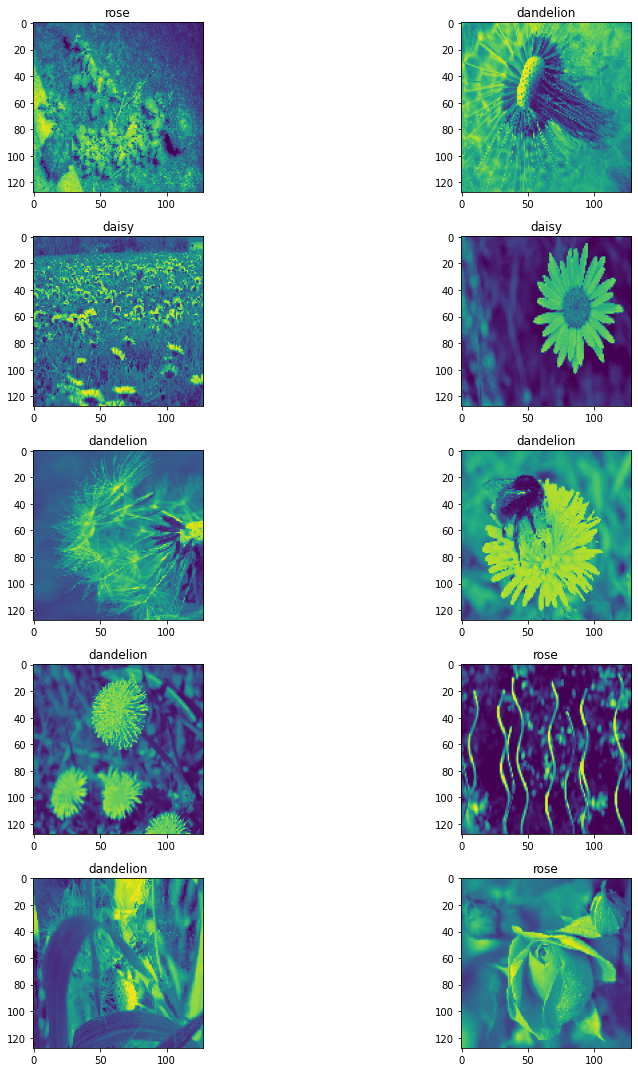

In [24]:
# Visualizing Some Random Flowers
import random
def draw_flower():
  fig,ax=plt.subplots(5,2)
  fig.set_size_inches(15,15)

  for i in range(5):
    for j in range(2):
      l = random.randint(0, len(labels))
      seq_img = features.squeeze()
      ax[i,j].imshow(seq_img[l])
      ax[i,j].set_title(labels[l])
  plt.tight_layout()

draw_flower()

In [20]:
# Converting Features Into A Numpy Array
features = np.array(features)
features.shape

(4325, 128, 128, 1)

In [26]:
# Converting Labels To A Numpy Array
labels = np.array(labels)
labels.shape

(4325,)

In [27]:
# Splitting The Data Set Into Training And Testing Data
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.4, random_state = 42)

In [28]:
# Checking Shape Of Training And Testing Data
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(2595, 128, 128, 1)
(2595,)
(1730, 128, 128, 1)
(1730,)


In [30]:
# Reshaping The Training And Testing Data
image_size = train_data.shape[1]
train_data = train_data.reshape((-1, image_size * image_size))
test_data = test_data.reshape((-1, image_size * image_size))

In [31]:
# Scaling Training And Testing Data
train_data = train_data / 255.0
test_data = test_data / 255.0

In [33]:
# Checking The Shape Again
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(2595, 16384)
(1730, 16384)
(2595,)
(1730,)


In [35]:
# One Hot Encoding Labels
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)

In [36]:
print(train_labels.shape)
print(test_labels.shape)

(2595,)
(1730,)


In [66]:
# Making Base Model
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_shape = (train_data.shape[-1],)))
model.add(Dropout(0.02))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              16778240  
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)              

In [67]:
# Compilation Step
model.compile(optimizer = Adam(0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [68]:
# Fitting Model On 80 Epochs
history = model.fit(train_data, train_labels, epochs = 80, batch_size = 128)

Epoch 1/80
21/21 [==============================] - 5s 210ms/step - loss: 2.4836 - accuracy: 0.1914
Epoch 2/80
21/21 [==============================] - 4s 208ms/step - loss: 1.7558 - accuracy: 0.2132
Epoch 3/80
21/21 [==============================] - 4s 208ms/step - loss: 1.6364 - accuracy: 0.2266
Epoch 4/80
21/21 [==============================] - 4s 209ms/step - loss: 1.6090 - accuracy: 0.2412
Epoch 5/80
21/21 [==============================] - 4s 208ms/step - loss: 1.5591 - accuracy: 0.2863
Epoch 6/80
21/21 [==============================] - 4s 207ms/step - loss: 1.5589 - accuracy: 0.2847
Epoch 7/80
21/21 [==============================] - 4s 206ms/step - loss: 1.5398 - accuracy: 0.2841
Epoch 8/80
21/21 [==============================] - 4s 210ms/step - loss: 1.5360 - accuracy: 0.2996
Epoch 9/80
21/21 [==============================] - 4s 209ms/step - loss: 1.5310 - accuracy: 0.2938
Epoch 10/80
21/21 [==============================] - 4s 209ms/step - loss: 1.5220 - accuracy: 0.3179

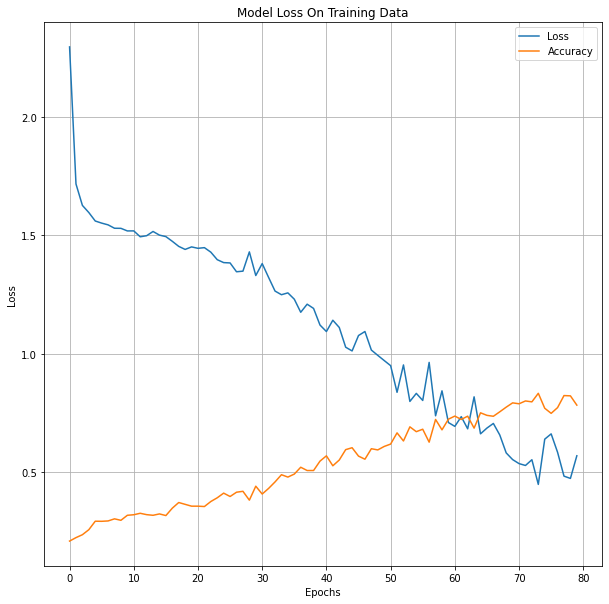

In [69]:
# Plotting Model Loss On Training Data
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss On Training Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])
plt.grid()
plt.show()

In [70]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions

array([[4.7511254e-02, 1.8676803e-02, 1.9395545e-04, 9.3099910e-01,
        2.6189180e-03],
       [1.7339504e-01, 2.4726950e-01, 1.3696589e-01, 2.0914391e-01,
        2.3322566e-01],
       [1.2712146e-01, 1.6806374e-01, 3.6060399e-01, 1.2681112e-01,
        2.1739978e-01],
       ...,
       [2.1090864e-01, 5.2744216e-01, 8.9739114e-02, 3.9020710e-02,
        1.3288938e-01],
       [9.4403472e-04, 4.9766239e-02, 7.2088230e-01, 2.2667302e-05,
        2.2838481e-01],
       [2.1354154e-01, 6.9472528e-01, 3.4013502e-02, 1.2684621e-02,
        4.5035072e-02]], dtype=float32)

In [71]:
# Evaluating Model On Test Data
testing = model.evaluate(test_data, test_labels)
testing

55/55 [==============================] - 2s 31ms/step - loss: 2.5736 - accuracy: 0.2884


[2.573615550994873, 0.2884393036365509]

In [75]:
model.save("Flower_Recognition_Model.h5")